# Overfitting on regression

In this project we investigate overfitting in regression.

### Import libraries

- uumpy: A Python library for working with arrays.
- train_test_split from sklean: A function which used for splitting test and train sets.
- Sequential from tensorflow.keras: It is used for generating regression model.
- Dense from tensorflow.keras.layers: For adding layers to the model.
- matplotlib: A Python package using for ploting. 
- GridSearchCV from sklearn: We will use it as a technique for finding the optimal parameter values from a given set of parameters in a grid.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## Data

### Creating data

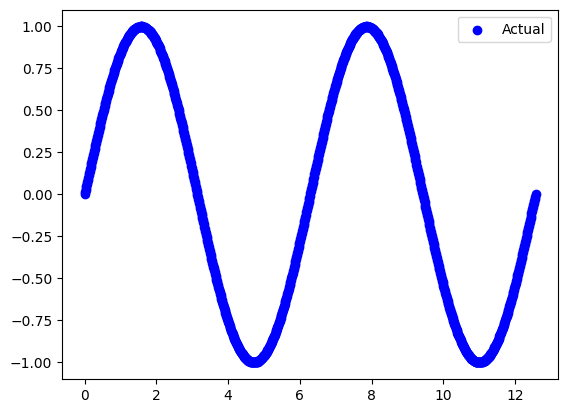

In [2]:
# Generate 1000 data points
num_points = 1000
x_values = np.linspace(0, 4 * np.pi, num_points)
y_values = np.sin(x_values)

# Plot the generated data
plt.scatter(x_values, y_values, color='blue', label='Actual', alpha=1)
plt.legend()
plt.show()

## Model

### Model Creation

In [23]:
# Define an empty list to store the test losses
loss_history = []

In [27]:
def increase_data(X, y, test_size, epochs, batch_size):
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Reshape data to have two dimensions
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create model with 2 layers
    model = Sequential([
        Dense(100, activation='relu', name='hidden_layer', input_shape=(1,)),
        Dense(1, activation="tanh", name='output_layer')
    ])

    # Compile the created model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predict test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model on test set
    test_loss = model.evaluate(X_test, y_test)
    print(f"Test loss with test_size = {test_size}: {test_loss}")
    
    # Plot actual vs predicted for training data
    plt.scatter(X_train, y_train, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_train, y_train_pred, color='red', label='Predicted', alpha=0.5)
    plt.title('Actual vs Predicted (Training Data)')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.show()

    # Plot actual vs predicted for testing data
    plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_test, y_test_pred, color='red', label='Predicted', alpha=0.5)
    plt.title('Actual vs Predicted (Testing Data)')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.show()

    return test_loss

In the following cell we are going to train and test the model with different test sizes; from 0.1 to 0.9.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.0326
Test loss with test_size = 0.1: 0.025496430695056915


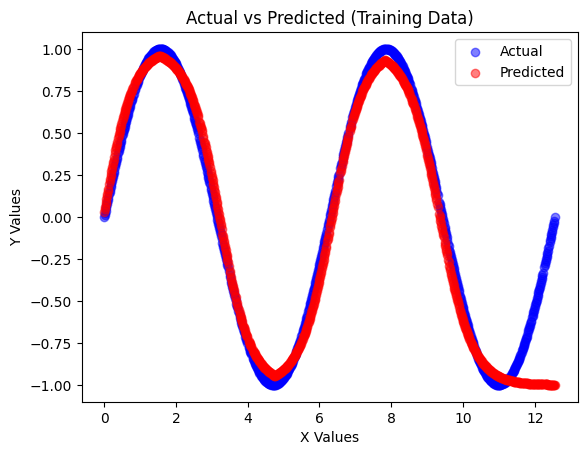

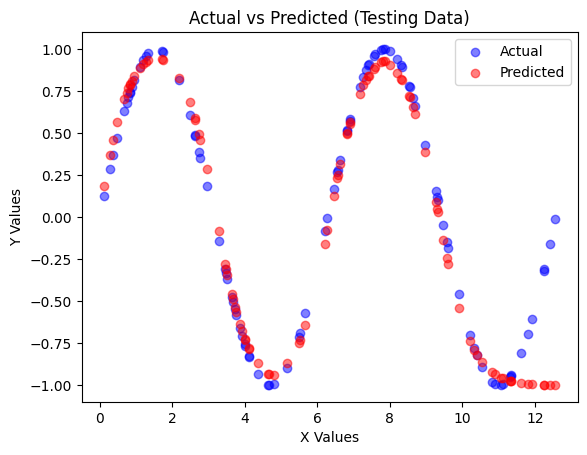

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.0357
Test loss with test_size = 0.2: 0.03278633579611778


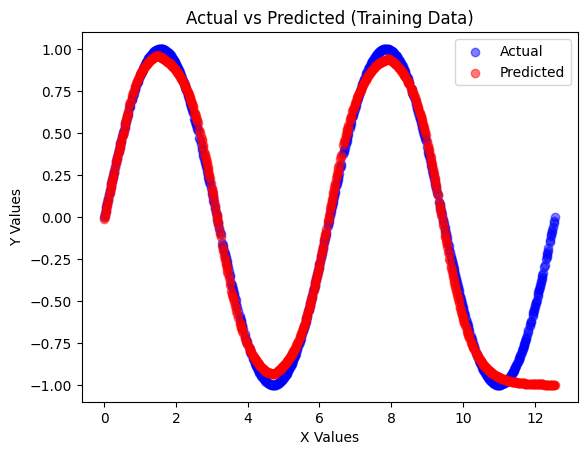

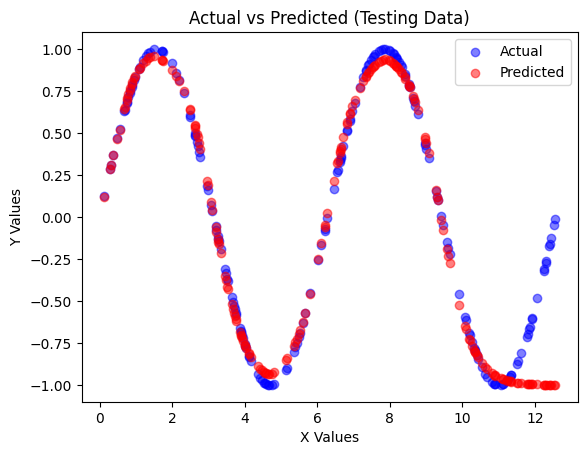

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.0374
Test loss with test_size = 0.30000000000000004: 0.0354924239218235


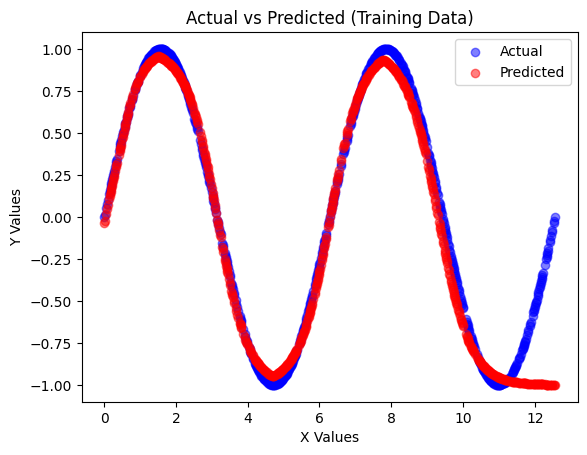

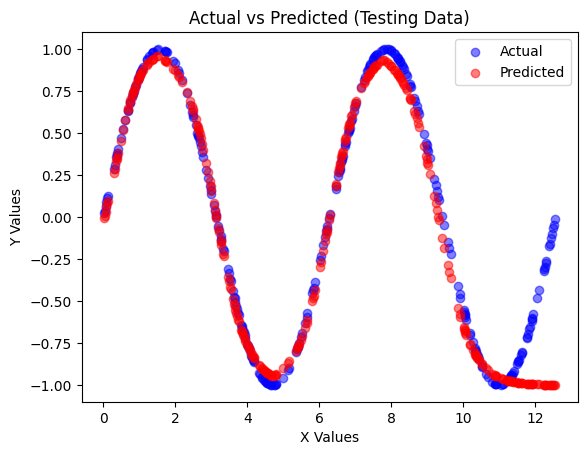

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.0363
Test loss with test_size = 0.4: 0.03590719401836395


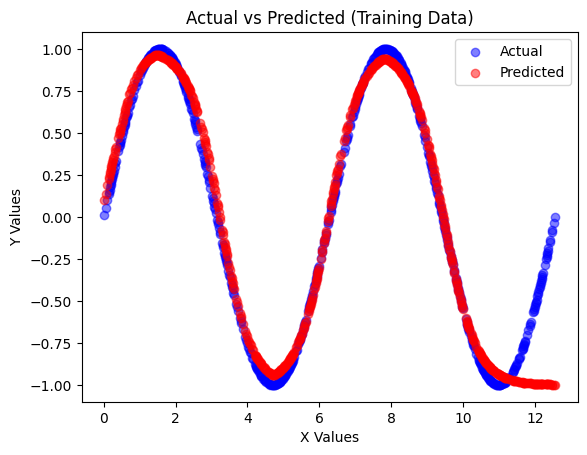

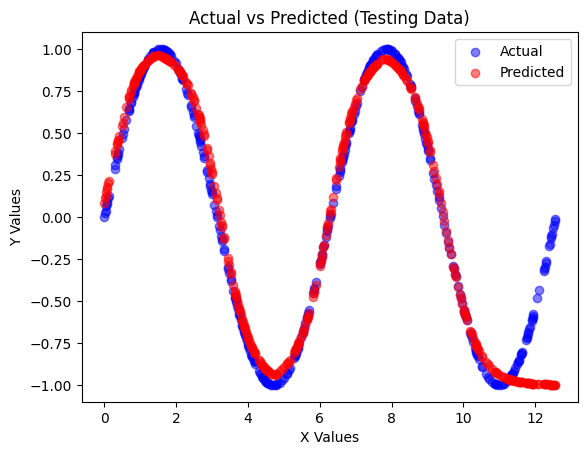

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.0349
Test loss with test_size = 0.5: 0.029714953154325485


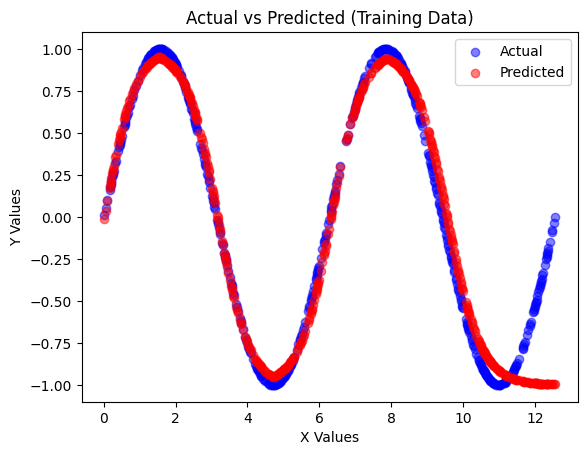

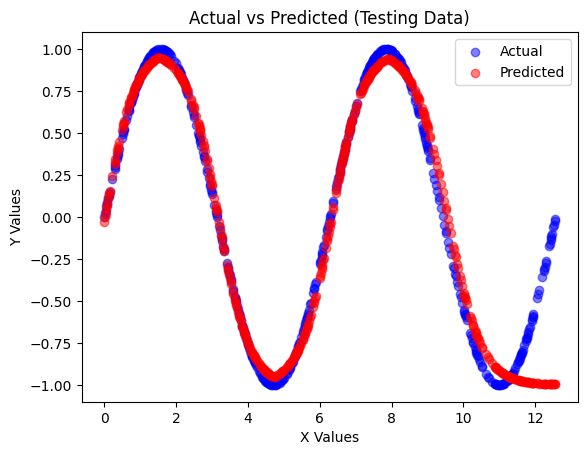

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.0901
Test loss with test_size = 0.6000000000000001: 0.08808247745037079


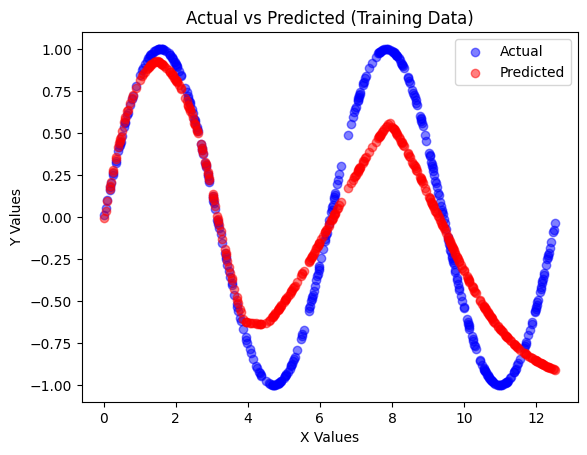

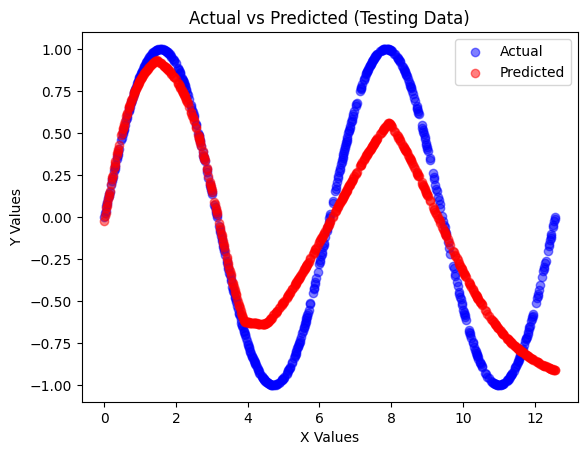

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.0592
Test loss with test_size = 0.7000000000000001: 0.057734742760658264


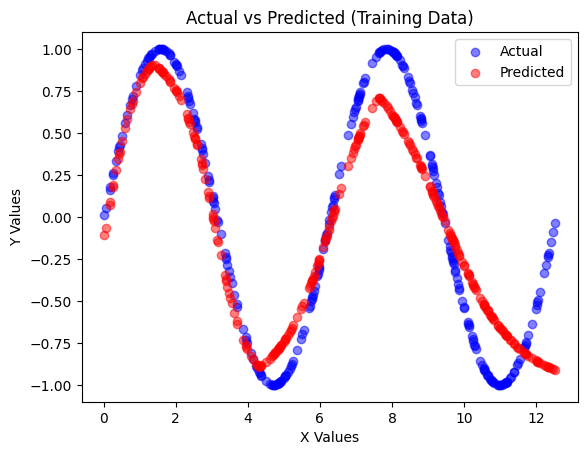

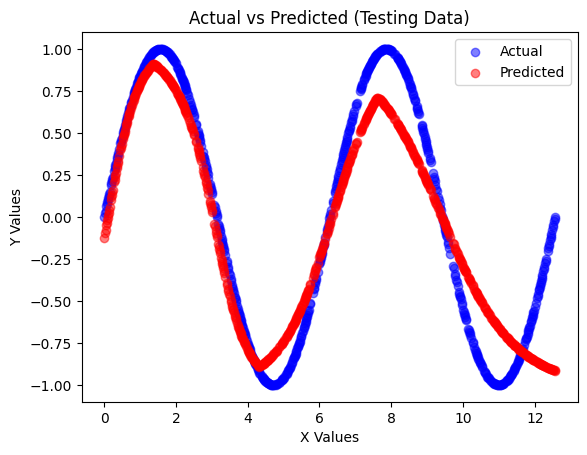

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.2703
Test loss with test_size = 0.8: 0.27485692501068115


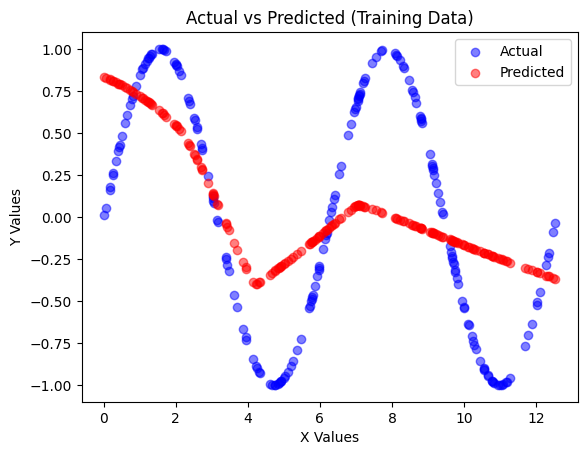

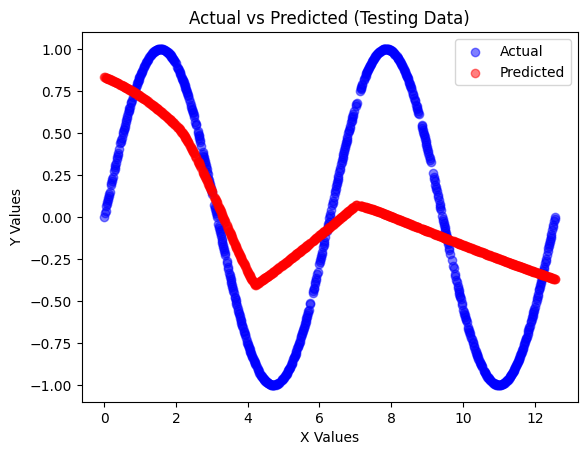

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.4135
Test loss with test_size = 0.9: 0.40065422654151917


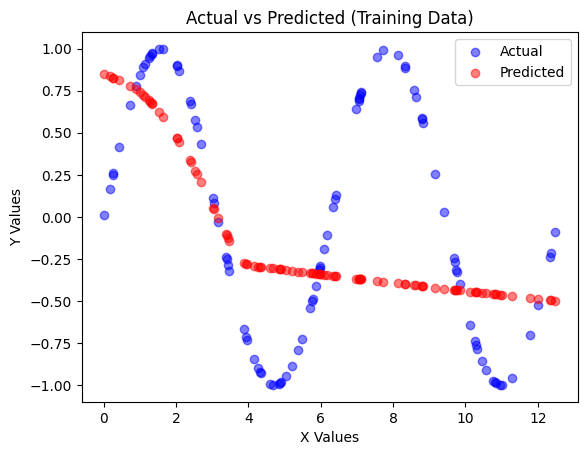

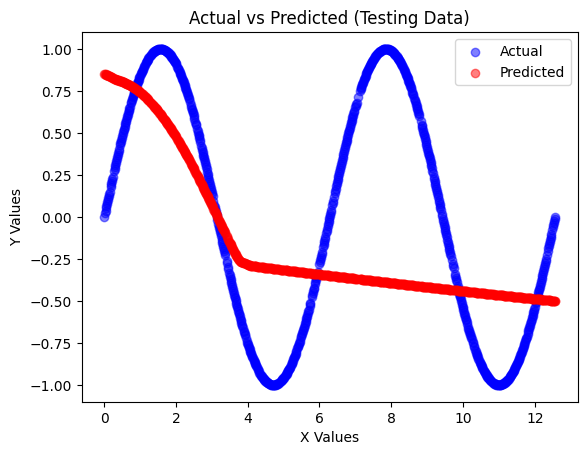

In [29]:
for i in range(1, 10):
    loss_history.append(increase_data(x_values, y_values, i * 0.1, 100, 1))

Finally, we plot the losses which we stored for easier analyzing.

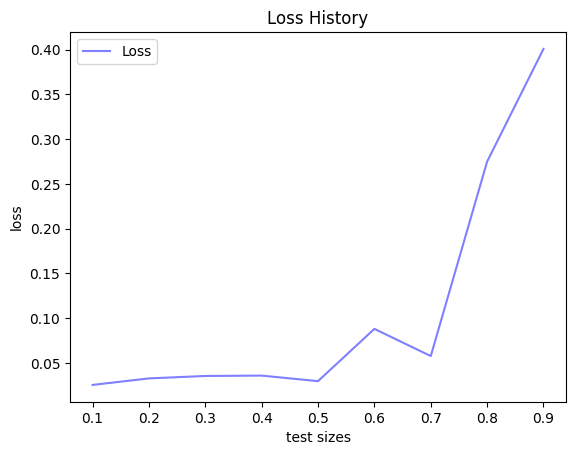

In [45]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ,0.8, 0.9]

plt.plot(test_sizes, loss_history, color='blue', label='Loss', alpha=0.5)
plt.title('Loss History')
plt.xlabel('test sizes')
plt.ylabel('loss')
plt.legend()
plt.show()

From the above plot, we can conclude that overally by increasing test size, loss decreases. Thus, increasing the test size and decresing the train size makes model weaker.

## Different Number of Layers

For this section, we considered 2 models:
1. Model with ReLU activation function in hidden layers and no activation function in output layer.
2. Model with tanh activation function in hidden layers and output layer.

In both cases we considerd 5 neurons for each hidden layer.

Let's consider the fisrt one. Fisrt of all, we define an empty list to store losses.

In [49]:
loss_history2 = []

Now, we define a function which generates, trains, and tests the model.

In [55]:
def increase_layers_relu(X, y, test_size, epochs, batch_size, num_layers, num_neurons=5):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Reshape data to have two dimensions
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create model with variable number of layers and neurons
    model = Sequential()
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(num_neurons, activation='relu', name=f'hidden_layer_{i+1}', input_shape=(1,)))
        else:
            model.add(Dense(num_neurons, activation='relu', name=f'hidden_layer_{i+1}'))
    model.add(Dense(1, name='output_layer'))


    # Compile the created model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model on test set
    test_loss = model.evaluate(X_test, y_test)
    print(f"Test loss with {num_layers} layers and {num_neurons} neurons per layer: {test_loss}")

    # Plot actual vs predicted for training data
    plt.scatter(X_train, y_train, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_train, y_train_pred, color='red', label='Predicted', alpha=0.5)
    plt.title('Actual vs Predicted (Training Data)')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.show()

    # Plot actual vs predicted for testing data
    plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_test, y_test_pred, color='red', label='Predicted', alpha=0.5)
    plt.title('Actual vs Predicted (Testing Data)')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.show()

    return test_loss

For using the above function, we need to set some parameters:
- test size: As it is mentioned in the question, we have to consider 0.1 of the data points as test set and 0.9 as train set.
- batch size: We set it 1. So, in each step. model processes only one point. This causes that model learns better with not a big enogh train set.
- min_layer: First model has 1 layer.
- max_layer: Last model has 20 layers.
- epochs: 100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.3893
Test loss with 1 layers and 5 neurons per layer: 0.3492010235786438


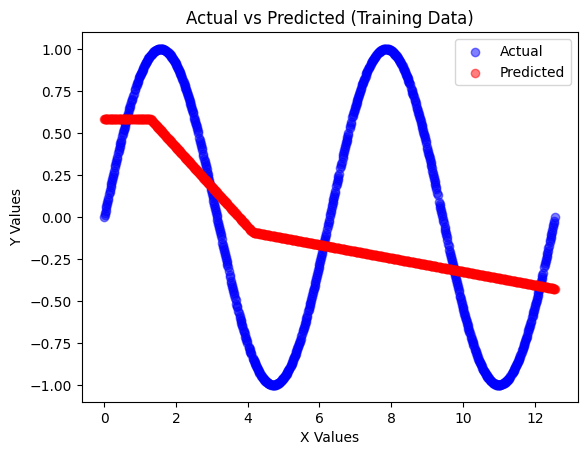

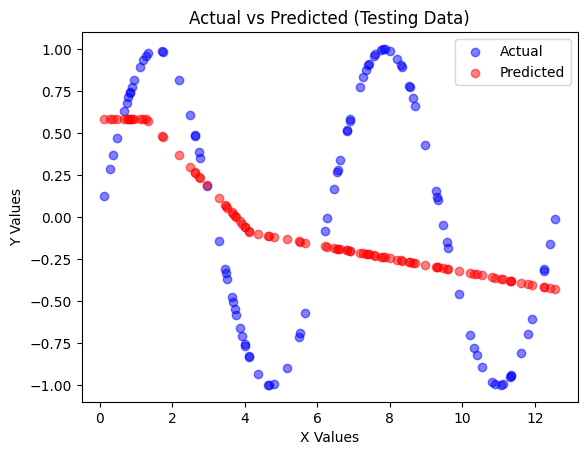

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.2874
Test loss with 2 layers and 5 neurons per layer: 0.25802865624427795


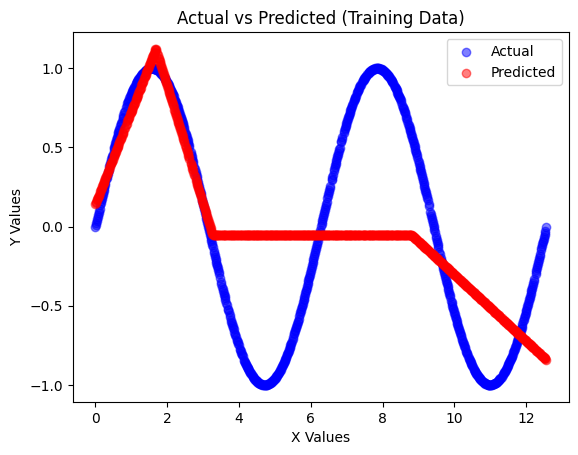

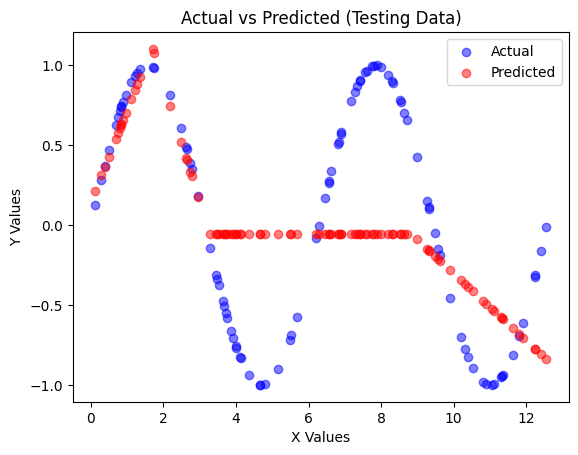

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.3540
Test loss with 3 layers and 5 neurons per layer: 0.3164066970348358


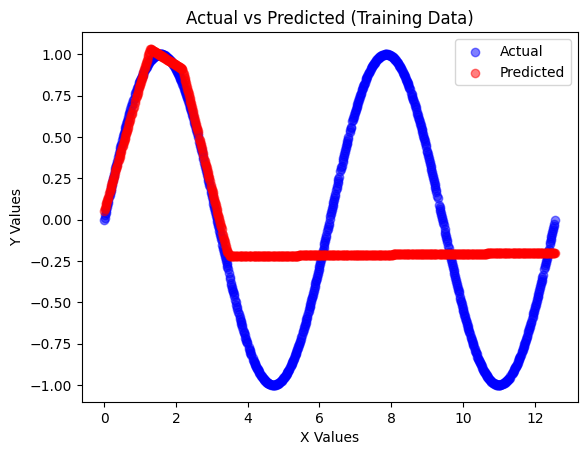

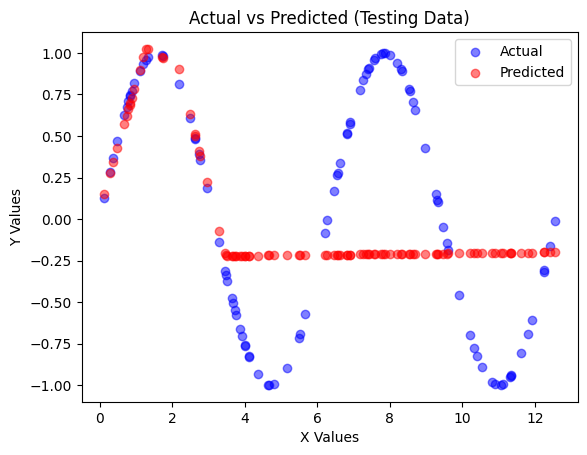

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.0095
Test loss with 4 layers and 5 neurons per layer: 0.009437564760446548


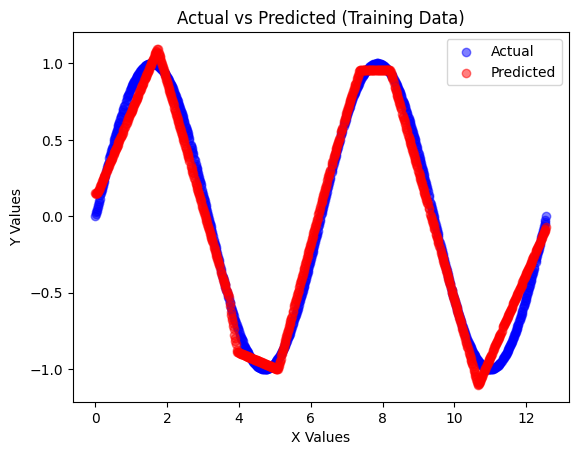

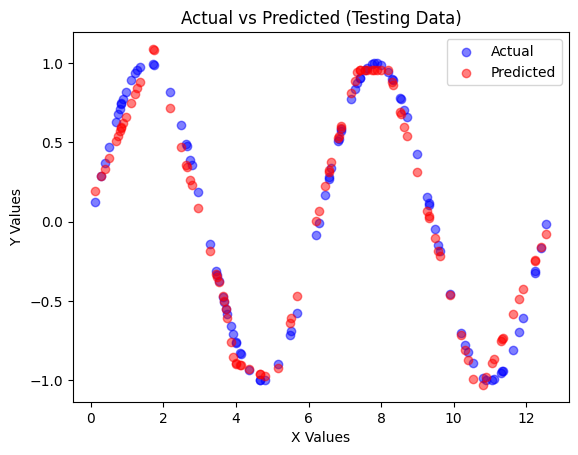

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.0065
Test loss with 5 layers and 5 neurons per layer: 0.006432148162275553


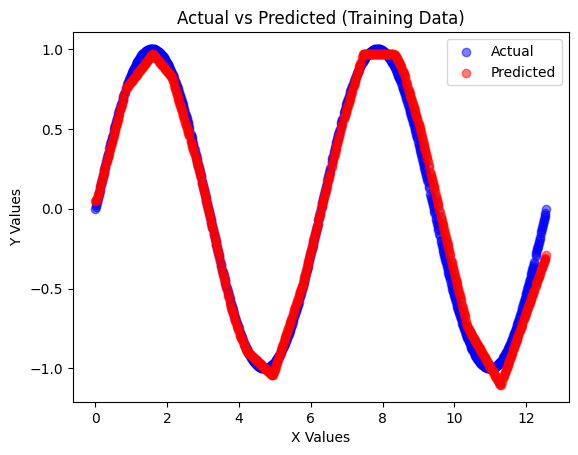

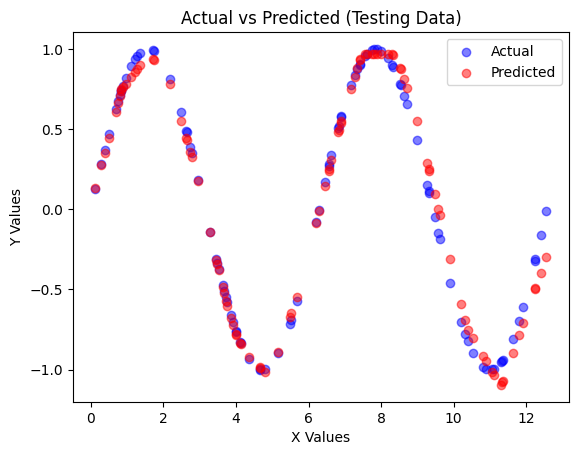

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.5076
Test loss with 6 layers and 5 neurons per layer: 0.49715307354927063


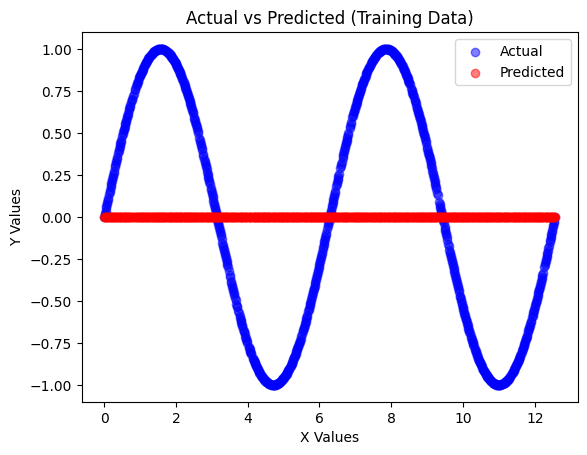

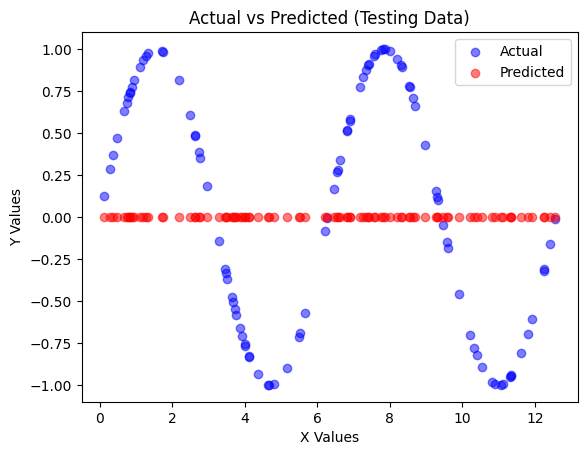

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.0870
Test loss with 7 layers and 5 neurons per layer: 0.08220133185386658


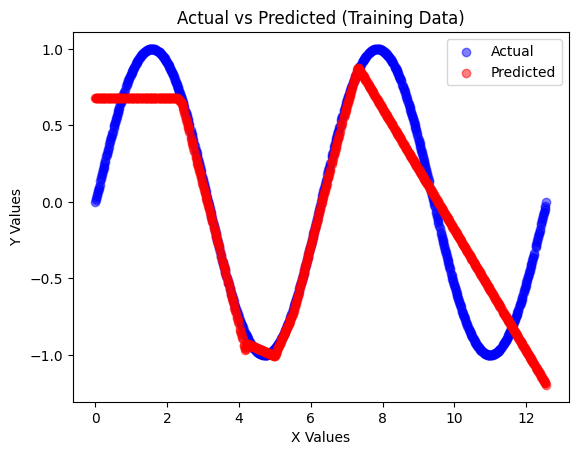

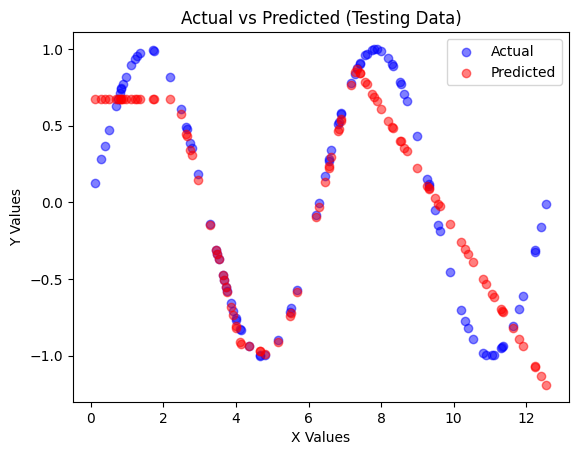

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.5076
Test loss with 8 layers and 5 neurons per layer: 0.497076153755188


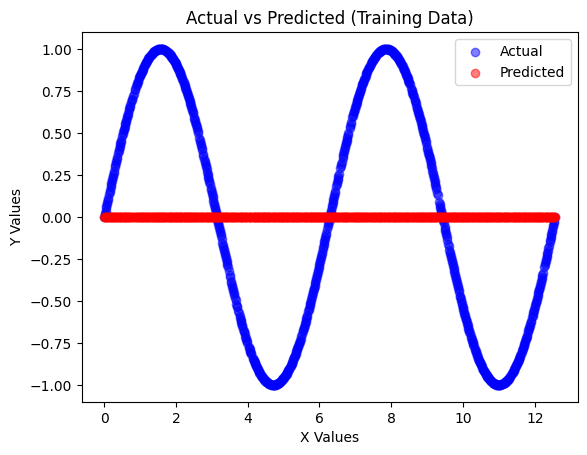

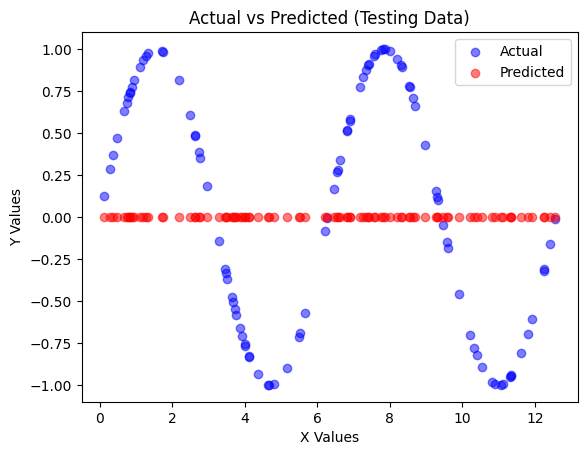

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.0047
Test loss with 9 layers and 5 neurons per layer: 0.0051495968364179134


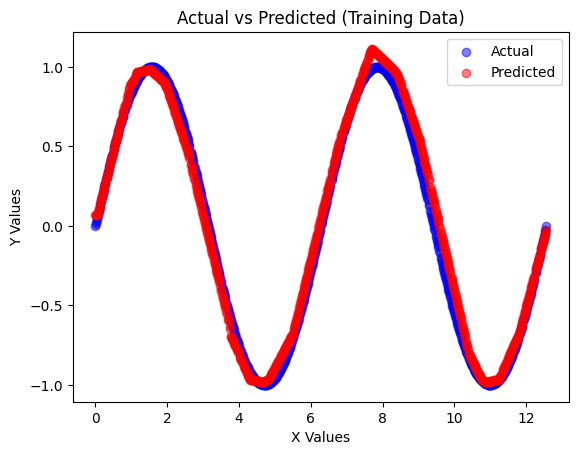

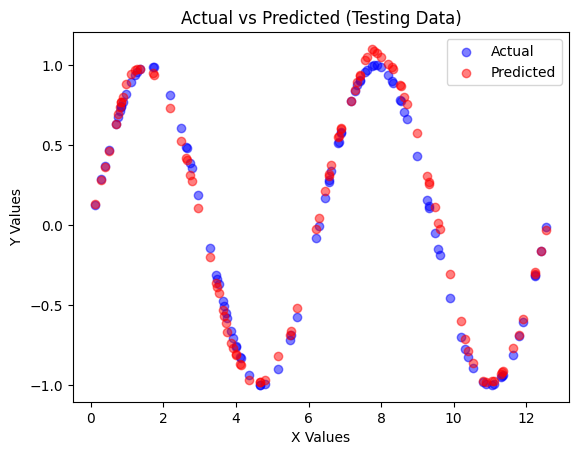

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.5072
Test loss with 10 layers and 5 neurons per layer: 0.4964216649532318


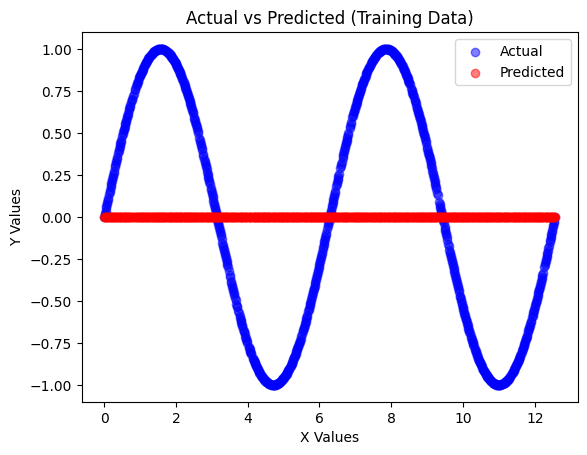

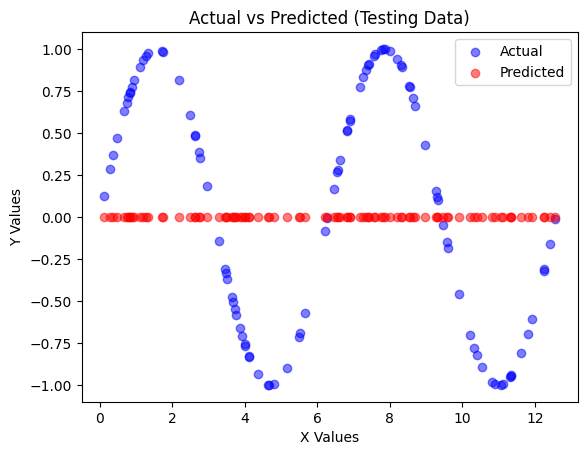

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.5086
Test loss with 11 layers and 5 neurons per layer: 0.4986673593521118


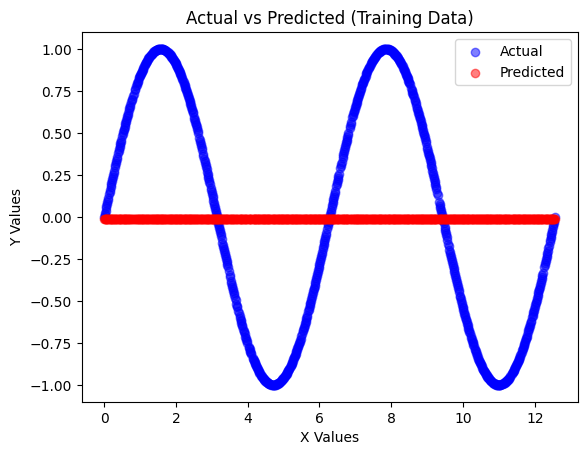

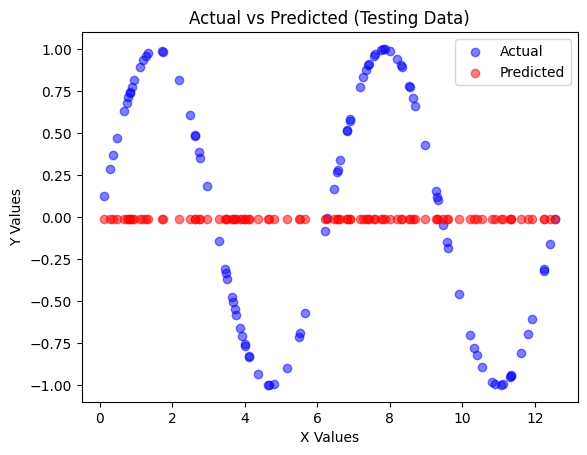

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5089 
Test loss with 12 layers and 5 neurons per layer: 0.4991971552371979


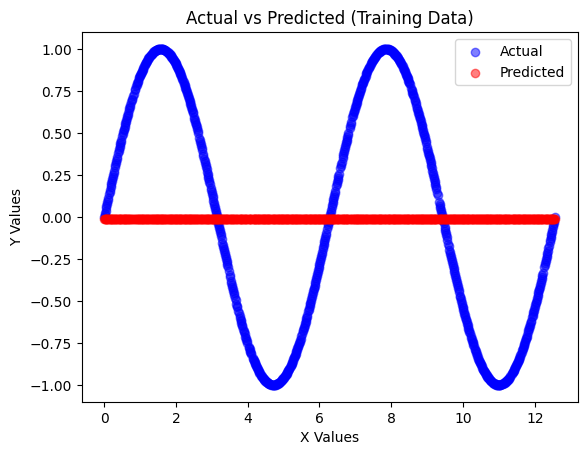

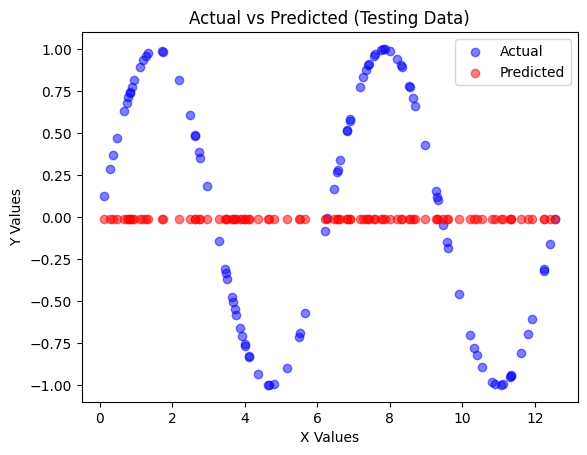

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.5085
Test loss with 13 layers and 5 neurons per layer: 0.49845796823501587


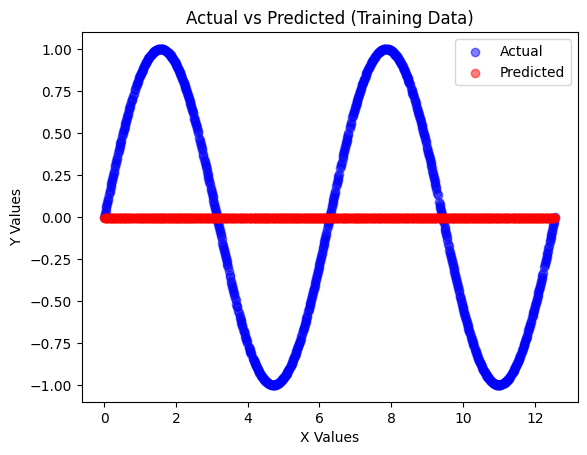

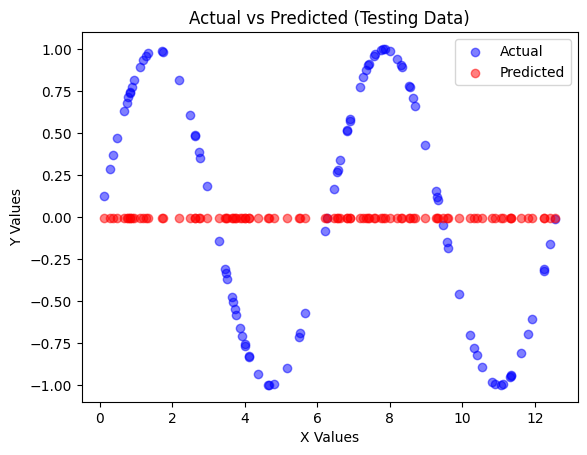

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5078  
Test loss with 14 layers and 5 neurons per layer: 0.4973835051059723


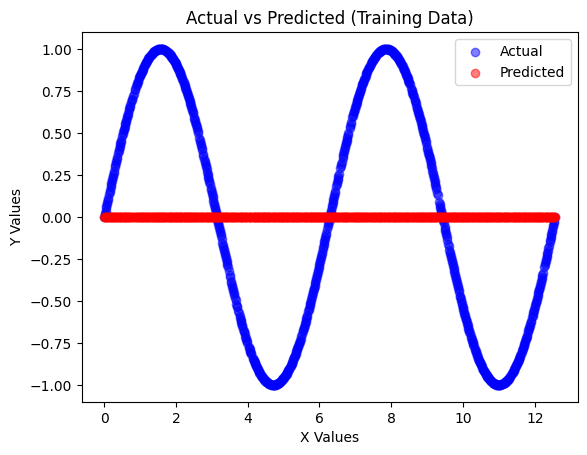

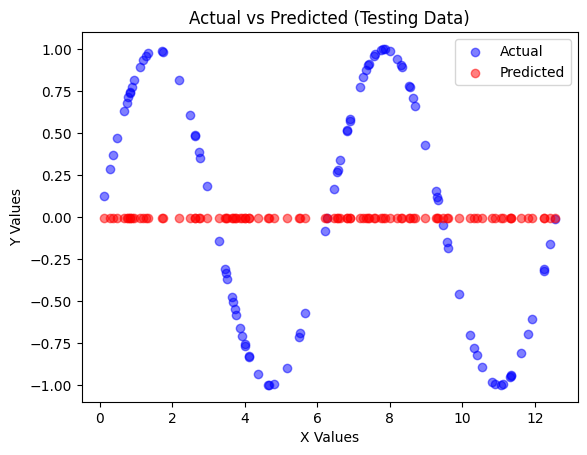

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0684  
Test loss with 15 layers and 5 neurons per layer: 0.06178128719329834


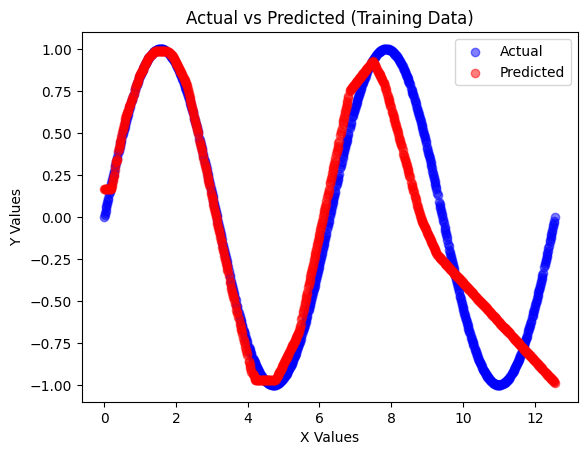

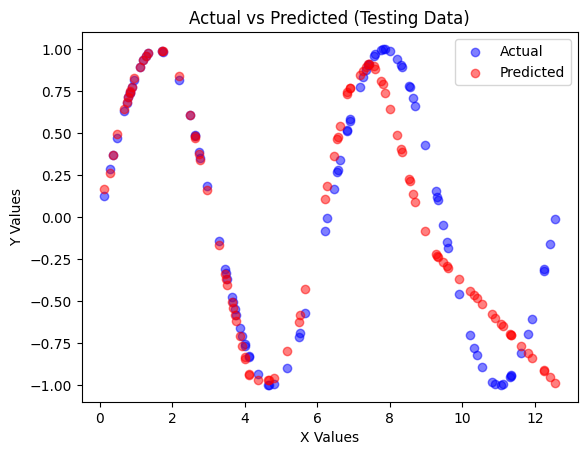

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5077  
Test loss with 16 layers and 5 neurons per layer: 0.4972230792045593


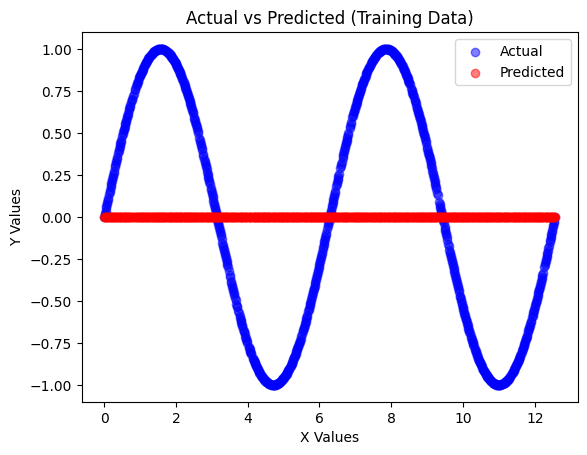

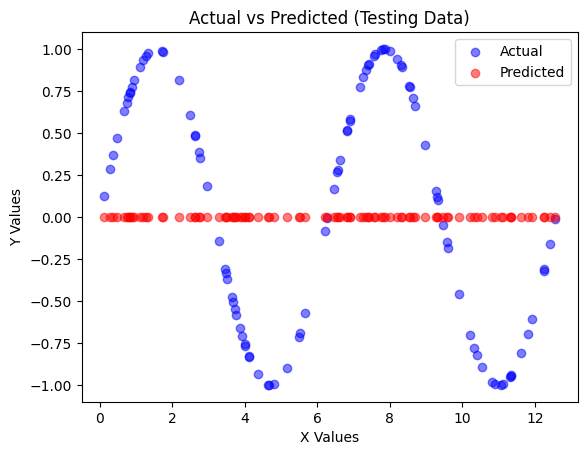

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5074  
Test loss with 17 layers and 5 neurons per layer: 0.49679115414619446


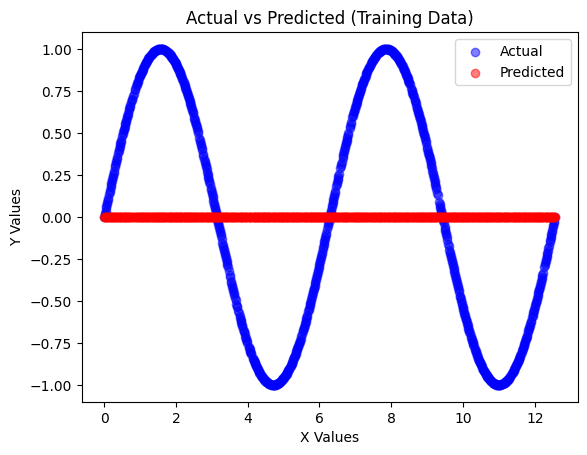

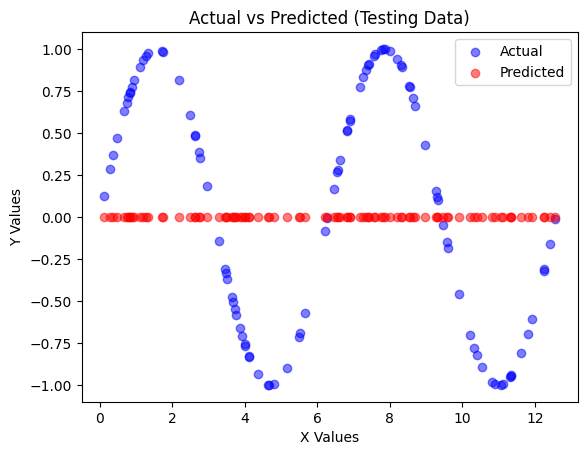

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5063  
Test loss with 18 layers and 5 neurons per layer: 0.49480968713760376


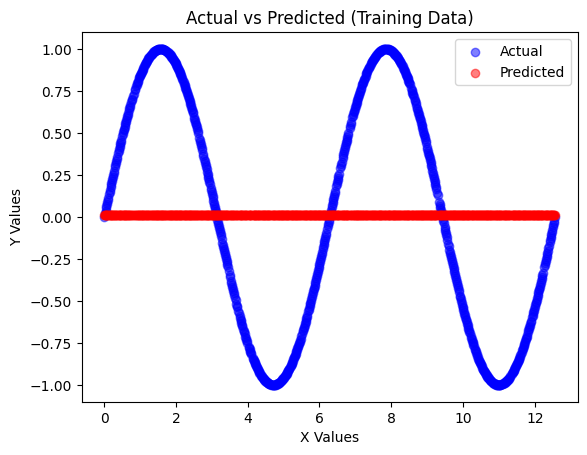

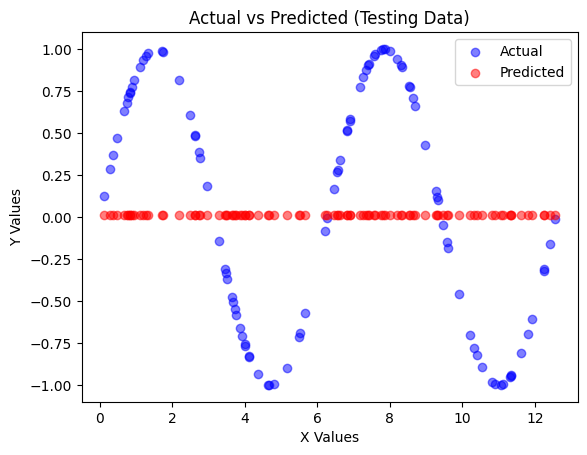

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5083  
Test loss with 19 layers and 5 neurons per layer: 0.4981566071510315


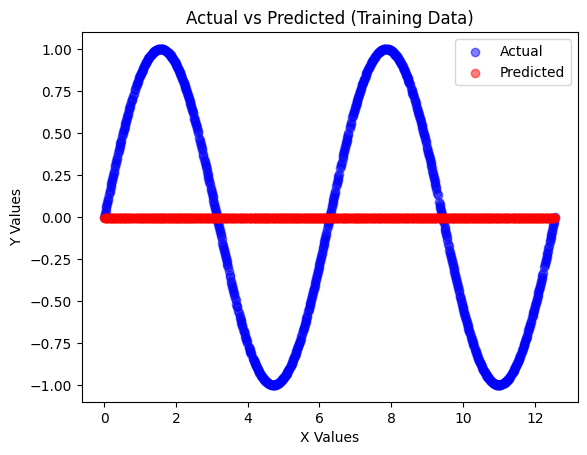

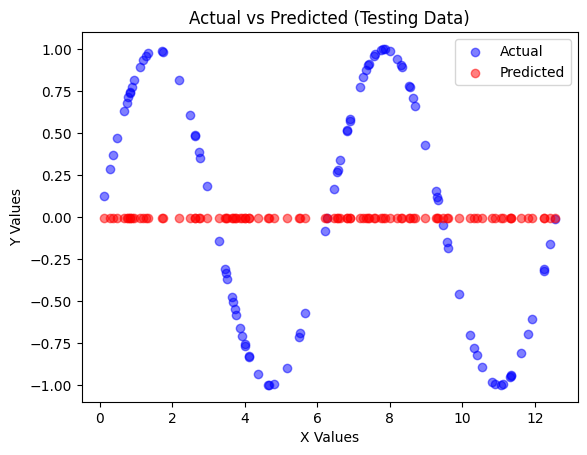

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5069  
Test loss with 20 layers and 5 neurons per layer: 0.496013343334198


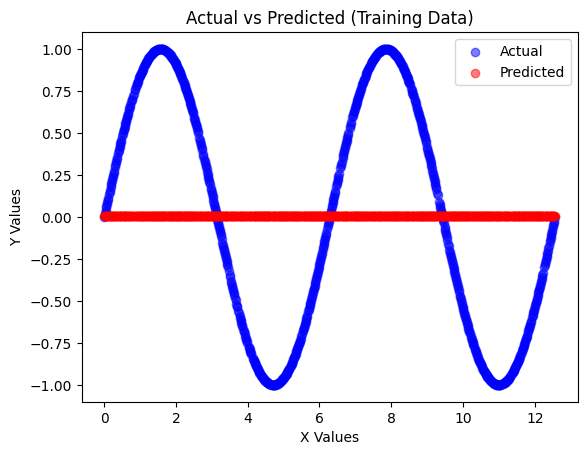

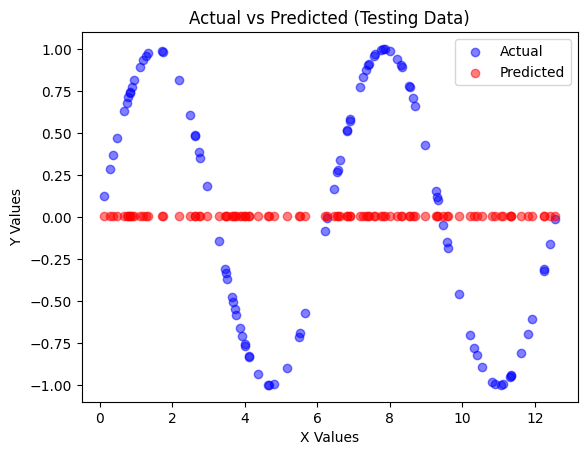

In [56]:
# Parameters for the loop
test_size  = 0.1
batch_size = 1
min_layer  = 1
max_layer  = 20
epochs     = 100

# Loop over different number of layers and neurons
for num_layers in range(min_layer, max_layer + 1):
    loss_history2.append(increase_layers_relu(x_values, y_values, test_size, epochs, batch_size, num_layers))


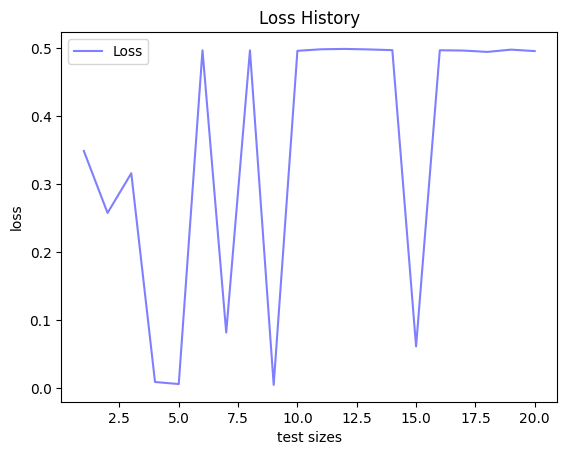

In [61]:
number_of_layers = [i for i in range(1, 21)]

plt.plot(number_of_layers, loss_history2, color='blue', label='Loss', alpha=0.5)
plt.title('Loss History')
plt.xlabel('test sizes')
plt.ylabel('loss')
plt.legend()
plt.show()

From the above plot we can conclude that the loss amount decreases until a certain amout of layers(5). After that, it goes up and down and the minimum loass occures when we have 9 layers in the model. After this amount of layers, the loss overally increases.

Now, we consider the second model with tanh activation in layers.

In [62]:
loss_history3 = []

In [63]:

def increase_layers_tanh(X, y, test_size, epochs, batch_size, num_layers, num_neurons=5):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Reshape data to have two dimensions
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create model with variable number of layers and neurons
    model = Sequential()
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(num_neurons, activation='tanh', name=f'hidden_layer_{i+1}', input_shape=(1,)))
        else:
            model.add(Dense(num_neurons, activation='tanh', name=f'hidden_layer_{i+1}'))
    model.add(Dense(1, activation='tanh', name='output_layer'))

    # Compile the created model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model on test set
    test_loss = model.evaluate(X_test, y_test)
    print(f"Test loss with {num_layers} layers and {num_neurons} neurons per layer: {test_loss}")

    # Plot actual vs predicted for training data
    plt.scatter(X_train, y_train, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_train, y_train_pred, color='red', label='Predicted', alpha=0.5)
    plt.title('Actual vs Predicted (Training Data)')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.show()

    # Plot actual vs predicted for testing data
    plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_test, y_test_pred, color='red', label='Predicted', alpha=0.5)
    plt.title('Actual vs Predicted (Testing Data)')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.show()

    return test_loss

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.0382
Test loss with 1 layers and 5 neurons per layer: 0.03215157613158226


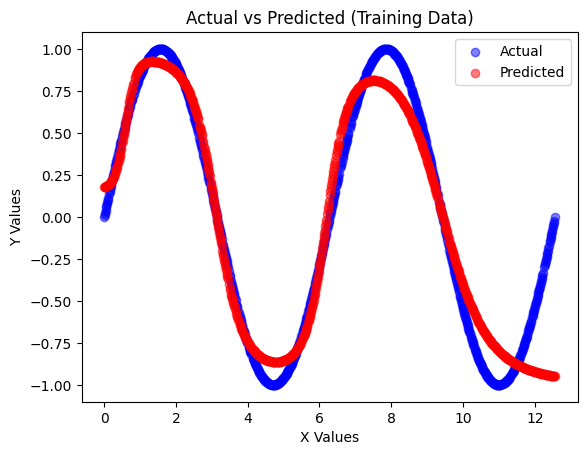

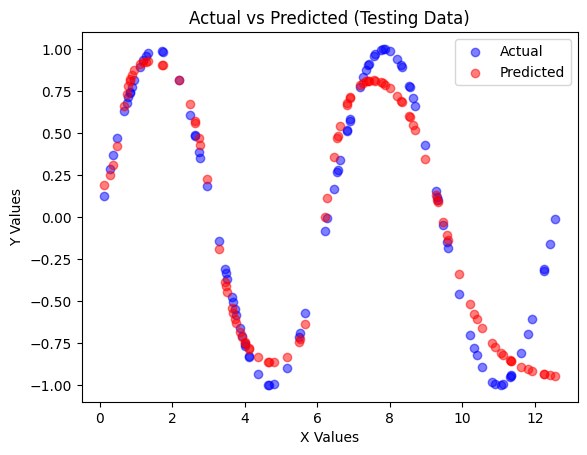

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.2922
Test loss with 2 layers and 5 neurons per layer: 0.2664435803890228


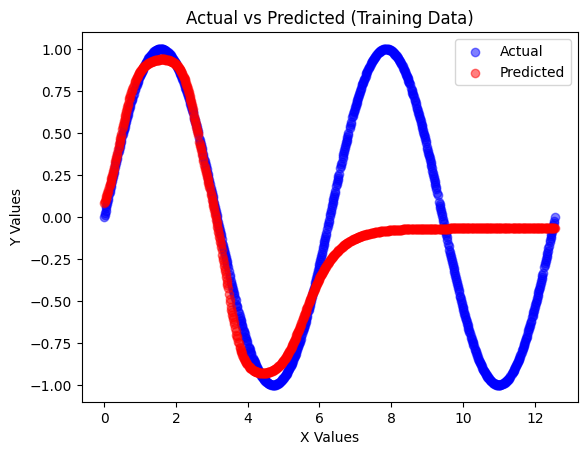

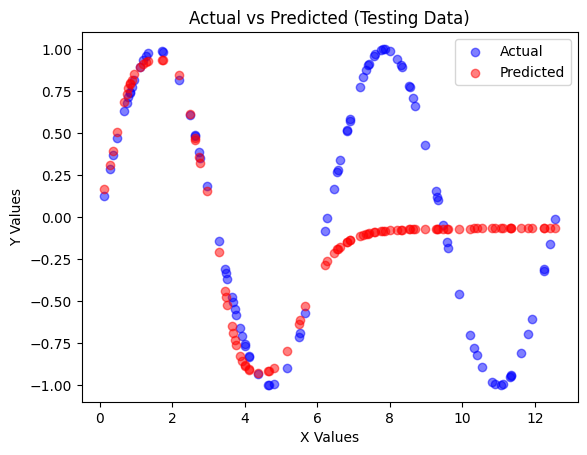

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.0022
Test loss with 3 layers and 5 neurons per layer: 0.0018403102876618505


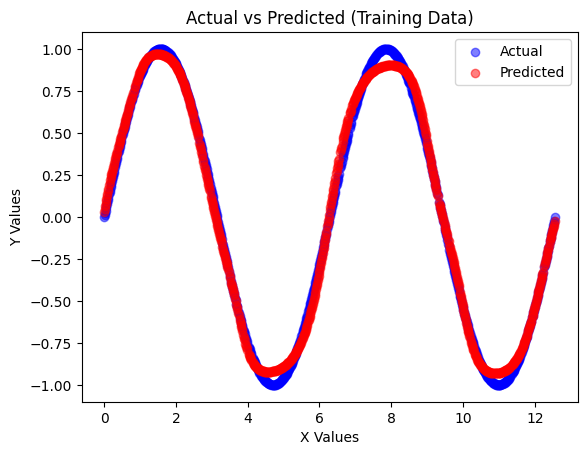

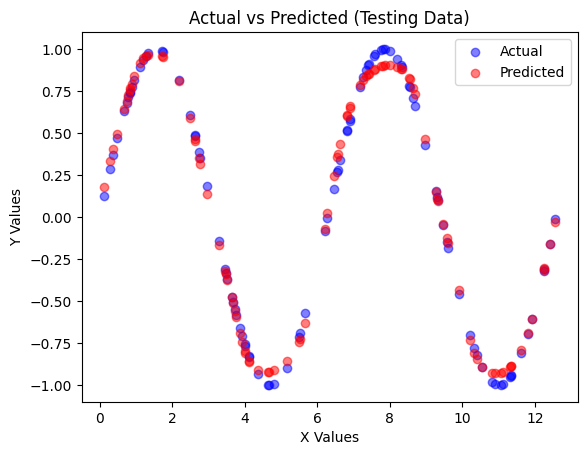

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.0011
Test loss with 4 layers and 5 neurons per layer: 0.0010613909689709544


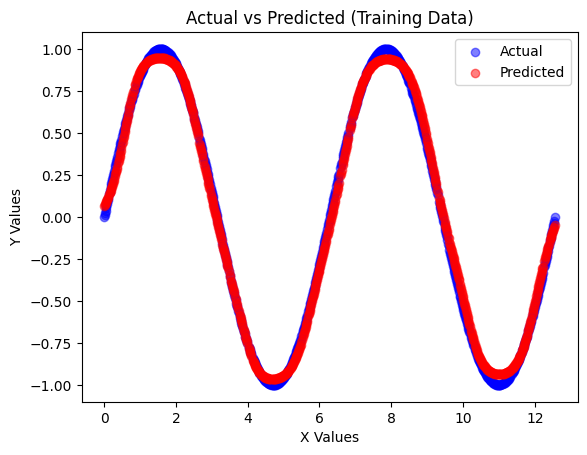

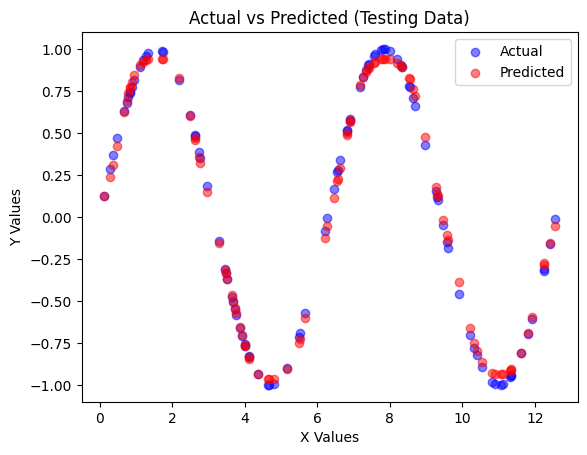

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.0020
Test loss with 5 layers and 5 neurons per layer: 0.001661390531808138


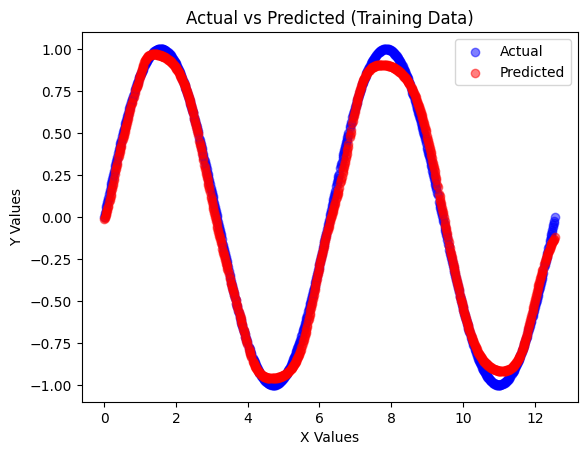

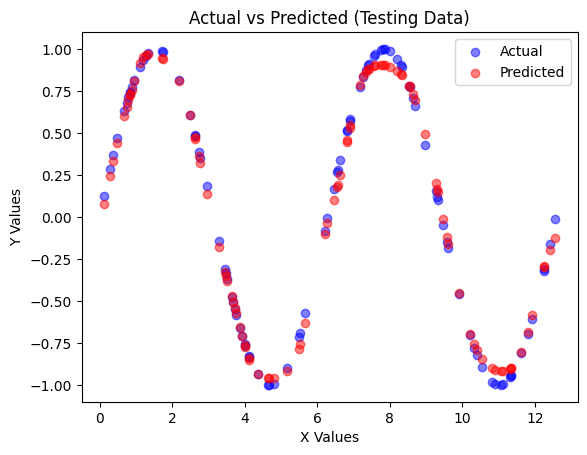

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 9.0476e-04
Test loss with 6 layers and 5 neurons per layer: 0.0007070366409607232


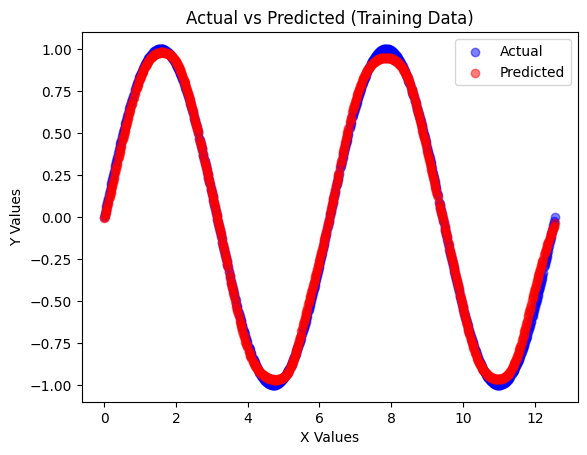

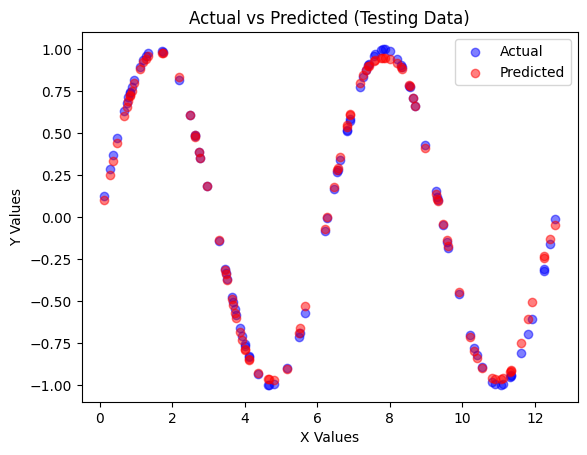

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0023
Test loss with 7 layers and 5 neurons per layer: 0.001988075440749526


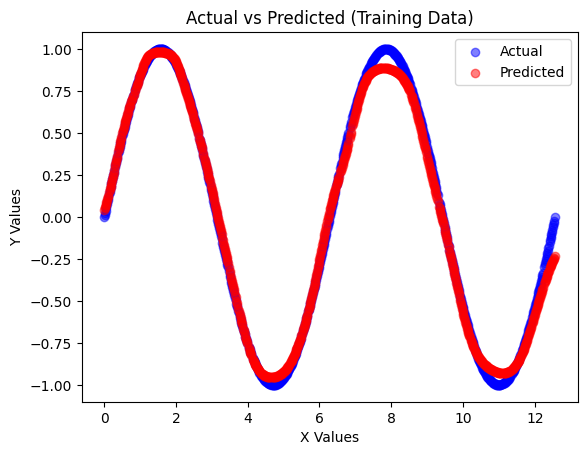

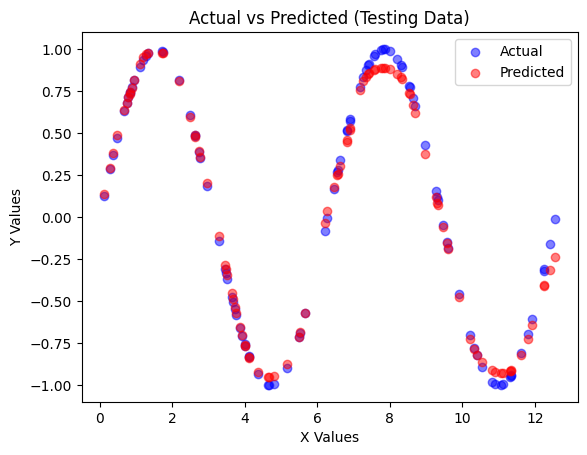

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.0020
Test loss with 8 layers and 5 neurons per layer: 0.0019335884135216475


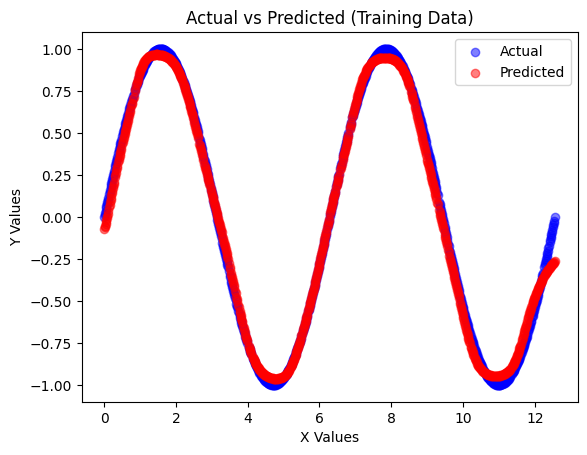

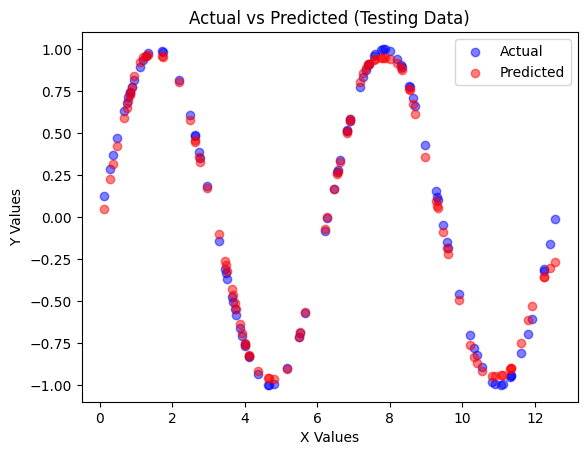

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.0035
Test loss with 9 layers and 5 neurons per layer: 0.0032038623467087746


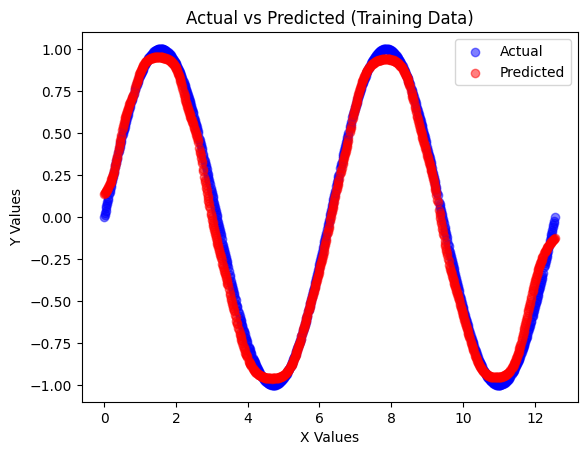

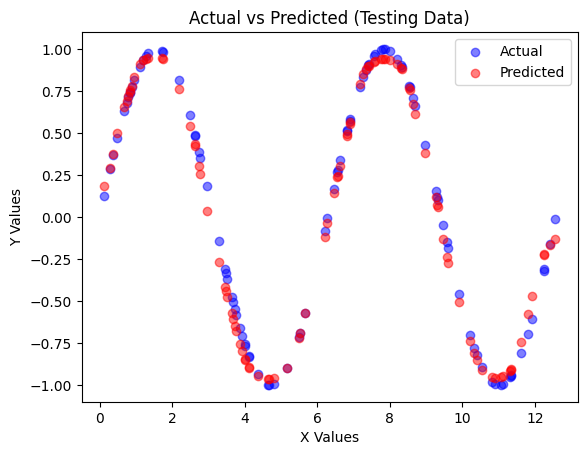

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.0201
Test loss with 10 layers and 5 neurons per layer: 0.01725091226398945


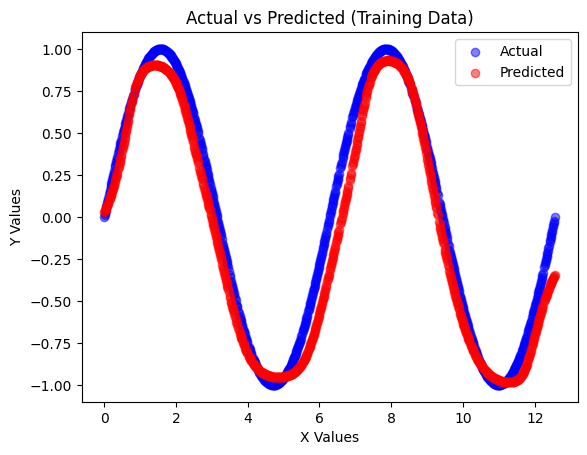

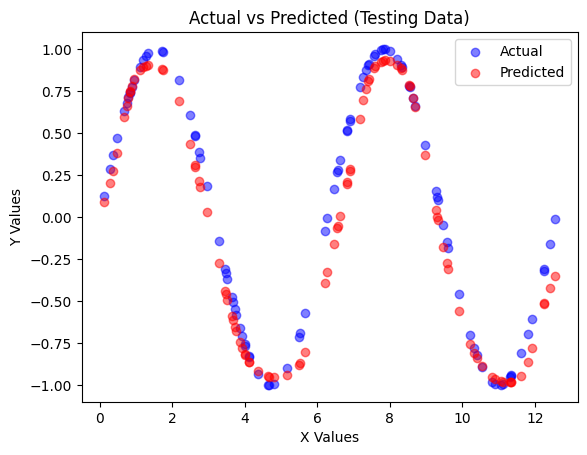

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0011
Test loss with 11 layers and 5 neurons per layer: 0.0008602972375229001


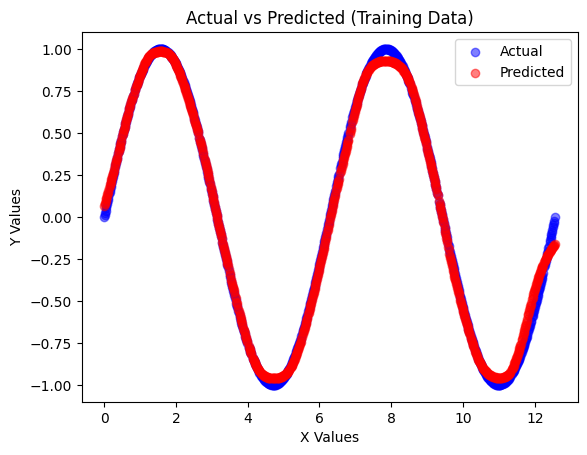

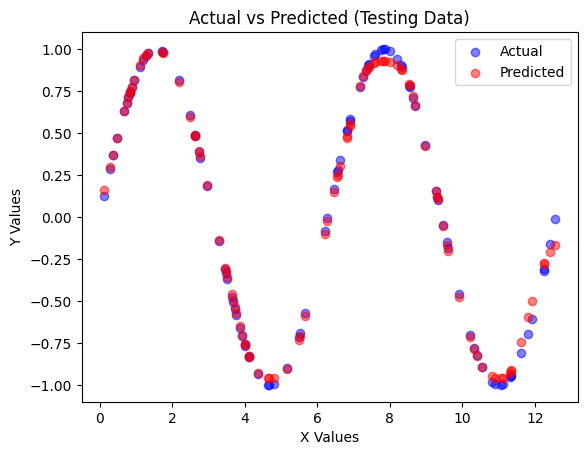

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0055
Test loss with 12 layers and 5 neurons per layer: 0.005695497617125511


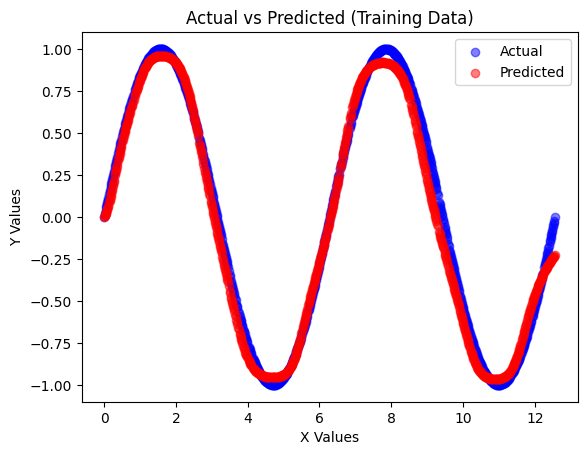

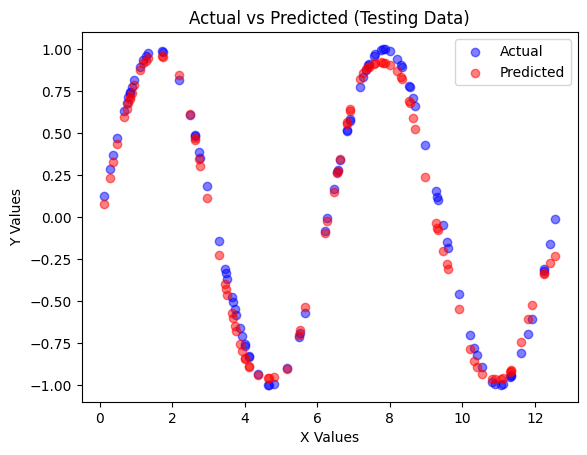

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0228 
Test loss with 13 layers and 5 neurons per layer: 0.01927969418466091


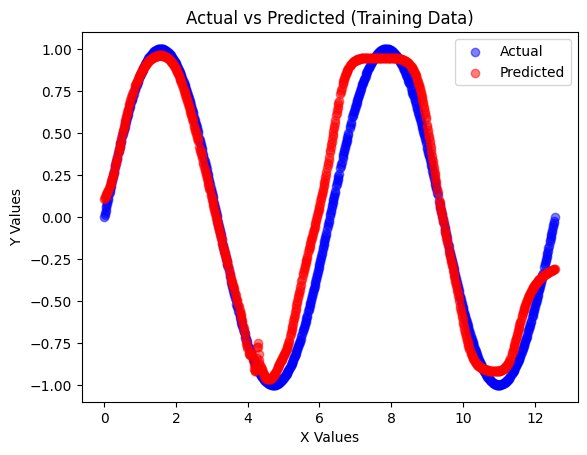

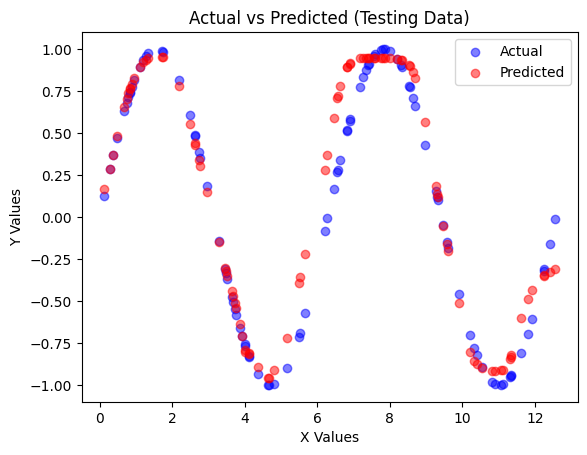

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0392  
Test loss with 14 layers and 5 neurons per layer: 0.04236618056893349


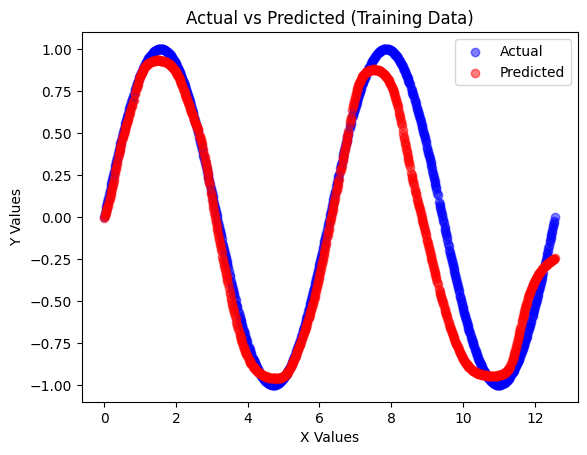

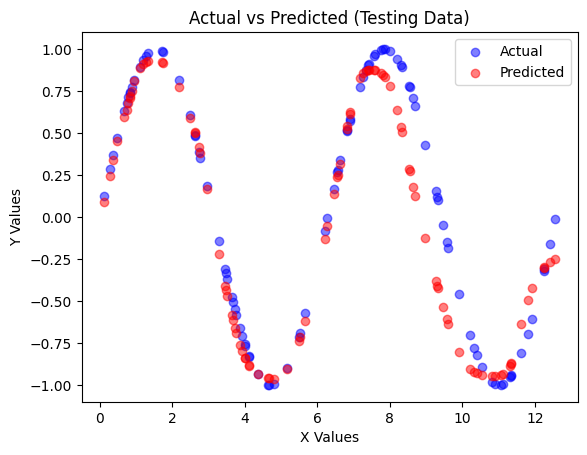

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053  
Test loss with 15 layers and 5 neurons per layer: 0.0047920397482812405


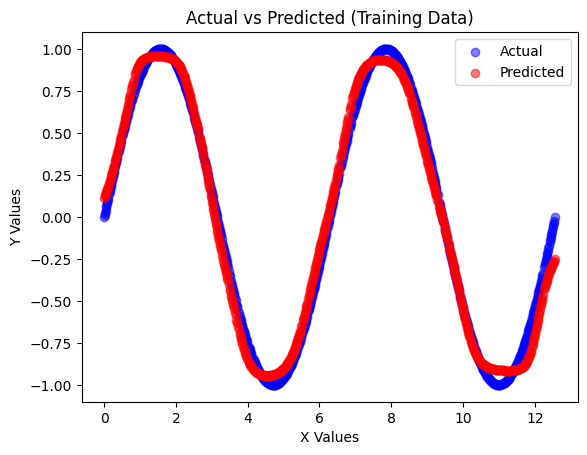

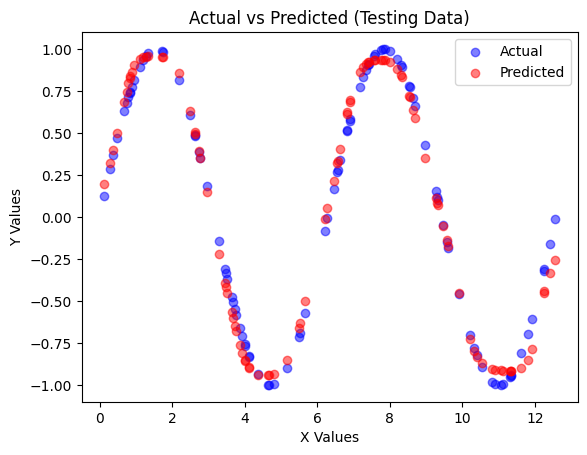

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0693  
Test loss with 16 layers and 5 neurons per layer: 0.07040681689977646


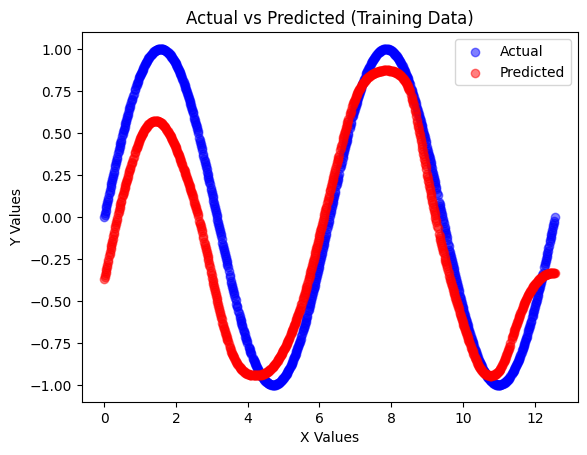

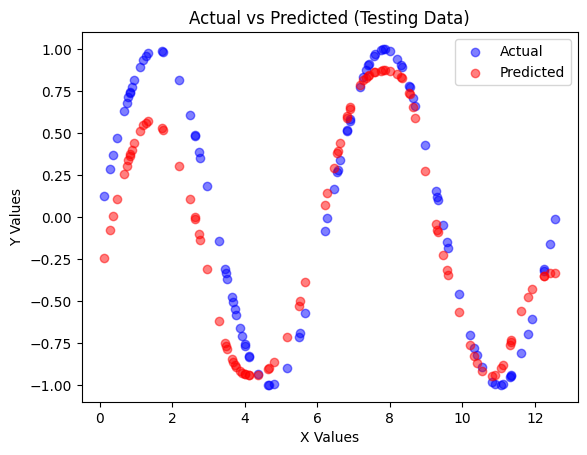

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0199  
Test loss with 17 layers and 5 neurons per layer: 0.01701897569000721


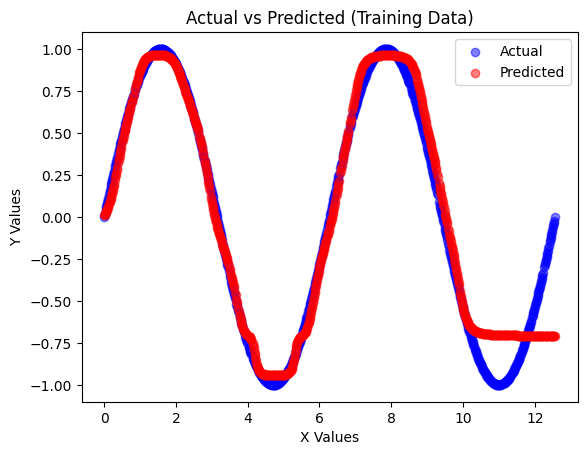

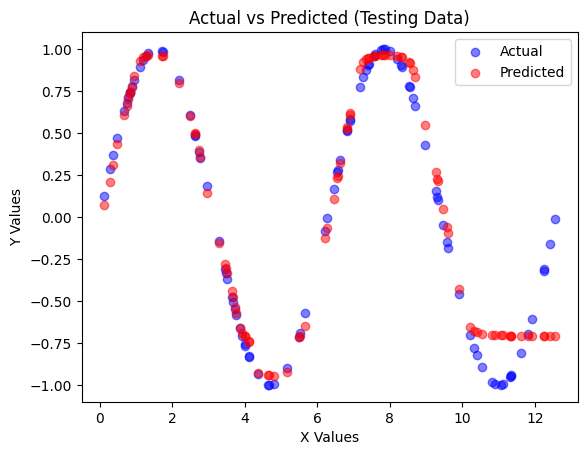

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2911  
Test loss with 18 layers and 5 neurons per layer: 0.26383891701698303


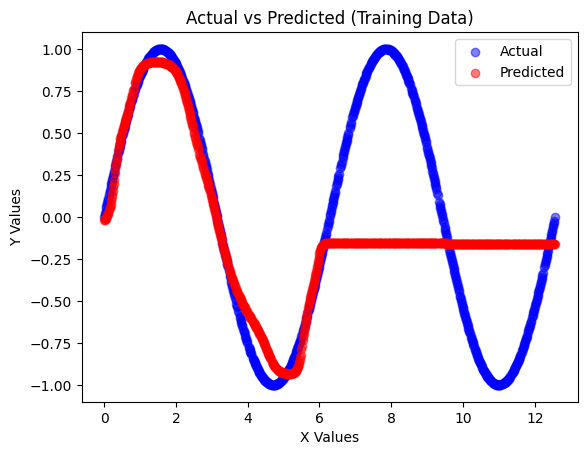

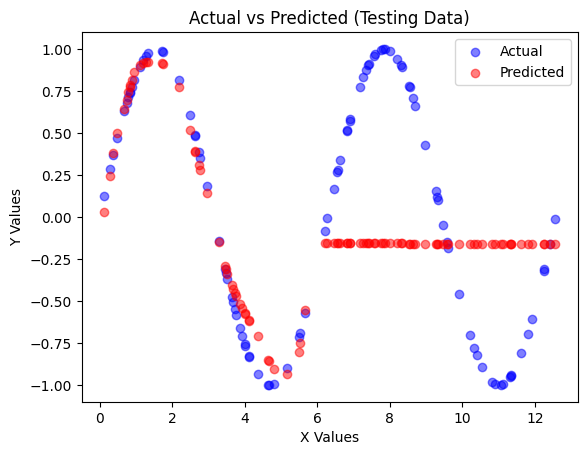

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0204  
Test loss with 19 layers and 5 neurons per layer: 0.0173258725553751


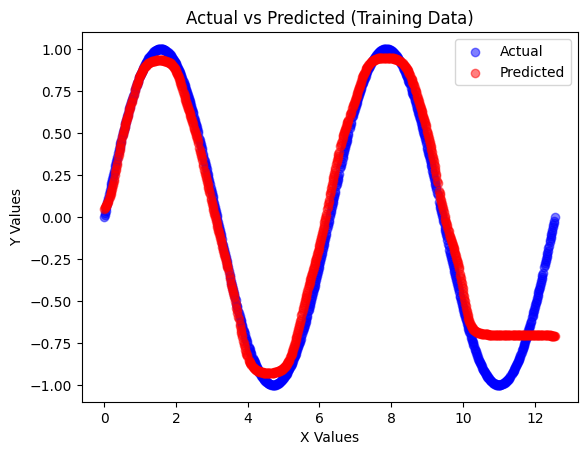

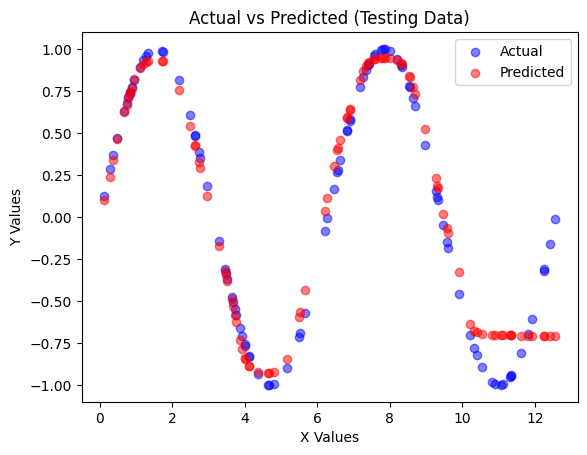

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0222  
Test loss with 20 layers and 5 neurons per layer: 0.01931803487241268


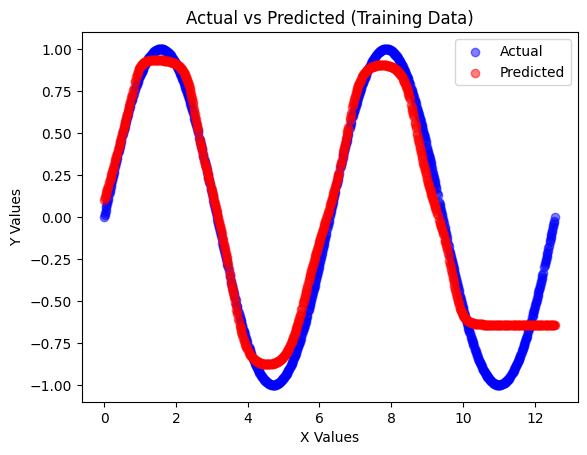

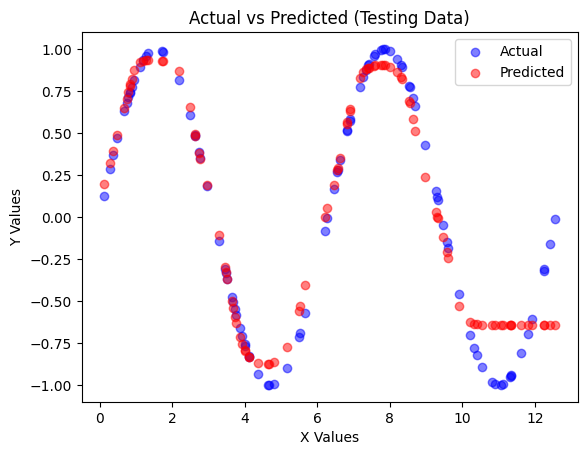

In [64]:
# Loop over different number of layers and neurons
for num_layers in range(min_layer, max_layer + 1):
    loss_history3.append(increase_layers_tanh(x_values, y_values, test_size, epochs, batch_size, num_layers))

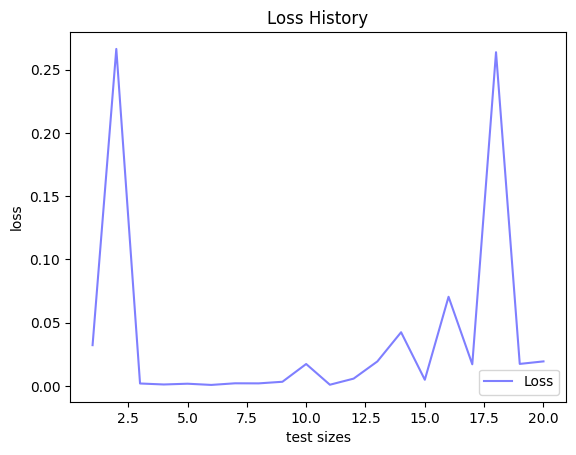

In [65]:
number_of_layers = [i for i in range(1, 21)]

plt.plot(number_of_layers, loss_history3, color='blue', label='Loss', alpha=0.5)
plt.title('Loss History')
plt.xlabel('test sizes')
plt.ylabel('loss')
plt.legend()
plt.show()

The above plot shows us that by increasing number of layers in the model, loss decreases overally until a certain number. But, after that, loss goes up and down.

When we use tanh as the activation function in layers, the maximum loss is less than the case with ReLU activation function. It's because tanh is always between -1 and 1, also sine function is always between -1 and 1. Thus, the result is smoother.

From both cases we considered above, we can conclude that increasing number of layers does not always decrease test loss. Thus, we have to test our model for different number of layers to get the best number for the specific model.

## GridSearchCV

In this section we need to define a class whcih creates a regression model. Next, we will use an instance of this class as an estimator for GridSearchCV.

In [3]:
# Define a class to create and train neural network models with a variable number of layers.
class create_model:

    # Initialize the class with the number of layers for the neural network.
    def __init__(self, num_layers=10):
        self.num_layers = num_layers
        self.model = self._build_model()  # Call the method to build the model.

    # Method to generate and return the neural network model.
    def _build_model(self):
        model = Sequential()
        # Loop through the specified number of layers.
        for i in range(self.num_layers):
            # Add the first layer with input shape if it's the first layer.
            if i == 0:
                model.add(Dense(5, activation='tanh', input_shape=(1,)))
            else:
                model.add(Dense(5, activation='tanh'))  # Add subsequent layers.
        model.add(Dense(1, activation='tanh'))  # Output layer.
        model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model.
        return model

    # Method to train the model.
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train, batch_size=1, epochs=100, verbose=0)  # Train the model.
        return self  # Return self for compatibility with scikit-learn API.

    # Method to make predictions.
    def predict(self, X_test):
        return self.model.predict(X_test)  # Return predictions.

    # Method to evaluate the model's performance.
    def score(self, X_test, y_test):
        return -self.model.evaluate(X_test, y_test)  # Return negative mean squared error.

    # Method to get parameters of the model.
    def get_params(self, deep=True):
        return {'num_layers': self.num_layers}  # Return number of layers.

    # Method to set parameters of the model.
    def set_params(self, **params):
        self.num_layers = params['num_layers']  # Set number of layers from parameters.
        self.model = self._build_model()  # Rebuild the model with new parameters.
        return self  # Return self for compatibility with scikit-learn API.

# Define the grid of hyperparameters to search over.
param_grid = {'num_layers': [i for i in range(1, 21)]}

# Create an instance of the model.
model = create_model()

# Define GridSearchCV with the model, parameter grid, cross-validation, and scoring.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.1, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Perform grid search to find the best number of layers.
grid_search.fit(X_train, y_train)

# Get the best number of layers and the best score.
best_number_of_layers = grid_search.best_params_['num_layers']
best_score = -grid_search.best_score_

# Print the best number of layers and the best score.
print(f"Best number of layers: {best_number_of_layers}\nBest score: {best_score}")

10/10 [==============================] - 0s 823us/step
Best number of layers: 6
Best score: 0.003955611173656114
